In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data.ndim

1

In [5]:
type(train_data)

numpy.ndarray

In [6]:
type(train_data[0])

list

In [11]:
word_index = imdb.get_word_index()

In [12]:
type(word_index)

dict

In [13]:
reverse_word_index = dict(
                    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
                    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [16]:
y_train = np.asarray(train_labels).astype('float')
y_test = np.asarray(test_labels).astype('float')

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [20]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 375us/sample - loss: 0.5114 - accuracy: 0.7902 - val_loss: 0.3825 - val_accuracy: 0.8760
Epoch 2/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.3029 - accuracy: 0.9059 - val_loss: 0.3387 - val_accuracy: 0.8677
Epoch 3/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.2233 - accuracy: 0.9280 - val_loss: 0.2808 - val_accuracy: 0.8896
Epoch 4/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.1763 - accuracy: 0.9425 - val_loss: 0.2875 - val_accuracy: 0.8849
Epoch 5/20
15000/15000 [==============================] - 1s 94us/sample - loss: 0.1427 - accuracy: 0.9539 - val_loss: 0.2971 - val_accuracy: 0.8827
Epoch 6/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.1185 - accuracy: 0.9639 - val_loss: 0.2990 - val_accuracy: 0.8843
Epoch 7/20
15000/15000 [==============================

In [22]:
history_dict = history.history

In [23]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
import matplotlib.pyplot as plt

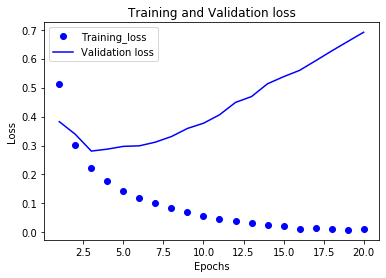

In [28]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


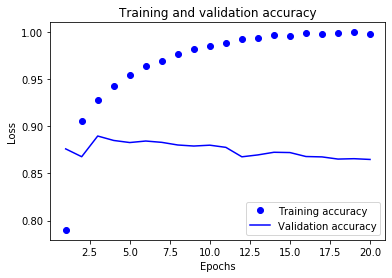

In [31]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4, batch_size = 512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 187us/sample - loss: 0.4268 - accuracy: 0.7998
Epoch 2/4
25000/25000 [==============================] - 3s 102us/sample - loss: 0.2395 - accuracy: 0.9093
Epoch 3/4
25000/25000 [==============================] - 3s 106us/sample - loss: 0.1864 - accuracy: 0.9285
Epoch 4/4
25000/25000 [==============================] - 3s 106us/sample - loss: 0.1459 - accuracy: 0.9462


In [50]:
results = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [51]:
results

[0.3229530815792084, 0.87812]

In [38]:
model.predict(x_test)

array([[0.22054997],
       [0.99957365],
       [0.8464571 ],
       ...,
       [0.13250071],
       [0.06551024],
       [0.5692725 ]], dtype=float32)

In [52]:
# 3.5 Classifying newswires:
# a multiclass classfication example

In [54]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [55]:
len(train_data)

8982

In [56]:
len(test_data)

2246

In [57]:
type(train_data)

numpy.ndarray

In [58]:
train_data.ndim

1

In [59]:
type(train_data[0])

list

In [60]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [61]:
train_labels[10]

3

In [63]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [64]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [65]:
x_train.shape

(8982, 10000)

In [66]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [69]:
train_labels[0]

3

In [71]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [75]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [76]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [77]:
x_val=x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                   par)